# Exploratory Data Analysis

This notebook is used especially for the Data Analysis, Statistics and Visualizations on the given dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Load data
header_columns=["area","single","married, no kids","not married, no kids","married, with kids","not married, with kids","single parent","other","total"]
df = pd.read_excel('../data/2021_family_composition_amsterdam.xlsx',engine='openpyxl',skiprows=2,usecols="A:I")
df.head()

,area,single,"married, no kids","not married, no kids","married, with kids","not married, with kids",single parent,other,total
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A00a Kop Zeedijk,543,37,149,14,12,22,12,789
2,A00b Oude Kerk e.o.,331,20,104,8,3,20,12,498
3,A00c Burgwallen Oost,676,55,231,30,23,43,26,1084
4,A00d Nes e.o.,130,16,59,5,8,11,5,234


In [3]:
prices = pd.read_excel('../data/woz_prices_2021_amsterdam.xlsx',engine='openpyxl',skiprows=2,usecols="A:B")
prices.head()

,area,average woz value
0,NaN,NaN
1,A00a Kop Zeedijk,432583
2,A00b Oude Kerk e.o.,475037
3,A00c Burgwallen Oost,469793
4,A00d Nes e.o.,605863


In [4]:
#dropping the rows with all null values 
prices.dropna(how="all",inplace=True)
df.dropna(how="all",inplace=True)


In [5]:
#removing row with ASD Amsterdam as it's just a sum of all the other columns 
df = df.loc[df["area"] != "ASD Amsterdam"]
prices = prices.loc[prices["area"] != "ASD Amsterdam"]

In [6]:
#creating dataset with common data points based on area for building a predictor
df = df.merge(prices, on='area', how='inner')

In [7]:
# Check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   area                    418 non-null    object
 1   single                  418 non-null    object
 2   married, no kids        418 non-null    object
 3   not married, no kids    418 non-null    object
 4   married, with kids      418 non-null    object
 5   not married, with kids  418 non-null    object
 6   single parent           418 non-null    object
 7   other                   418 non-null    object
 8   total                   418 non-null    object
 9   average woz value       418 non-null    object
dtypes: object(10)
memory usage: 35.9+ KB


In [8]:
# Get basic statistics of numeric columns
df.describe()

,area,single,"married, no kids","not married, no kids","married, with kids","not married, with kids",single parent,other,total,average woz value
count,418,418,418,418,418,418,418,418,418,418
unique,416,335,203,229,212,133,187,46,376,387
top,F11f Teleport,-,-,-,-,-,-,-,1,.
freq,2,5,17,14,22,25,21,40,4,32


In [9]:
# As all the values are numeric, changing the datatypes
col=[ 'single','married, no kids','not married, no kids','married, with kids','not married, with kids','single parent','other','average woz value']
for x in col:
    df[x] = pd.to_numeric(df[x], errors='coerce')

<AxesSubplot:xlabel='average woz value', ylabel='Count'>

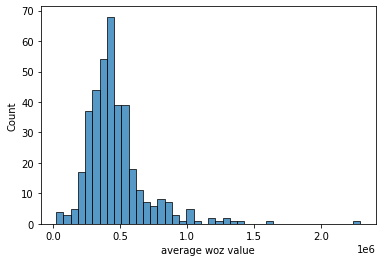

In [10]:
# Check the distribution of the target variable
sns.histplot(df['average woz value'], kde=False)

<AxesSubplot:>

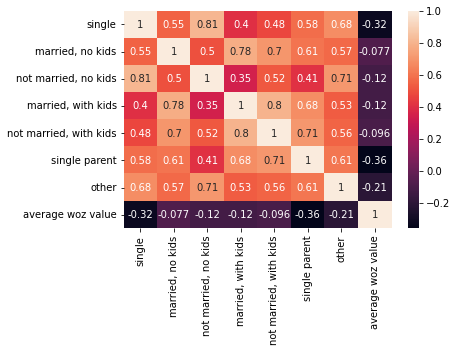

In [11]:
# Check the correlation between numeric features and the target
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)

<AxesSubplot:xlabel='area', ylabel='Count'>

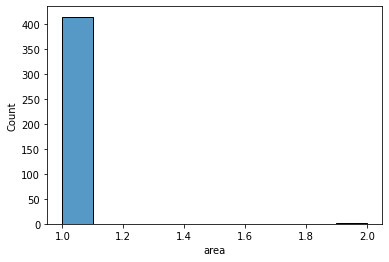

In [12]:
# Check the distribution of the area variable
area_counts = df['area'].value_counts()
sns.histplot(area_counts, kde=False)

<AxesSubplot:xlabel='average woz value', ylabel='area'>

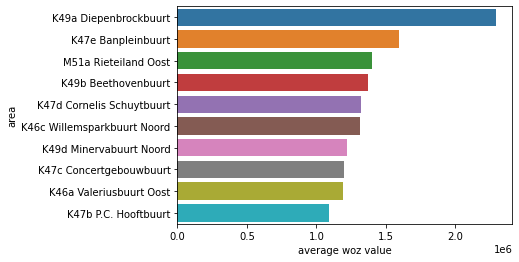

In [13]:
# Check the top areas with highest average woz value
top_areas = df.groupby('area')['average woz value'].mean().sort_values(ascending=False)[:10]
sns.barplot(x=top_areas, y=top_areas.index)


<AxesSubplot:>

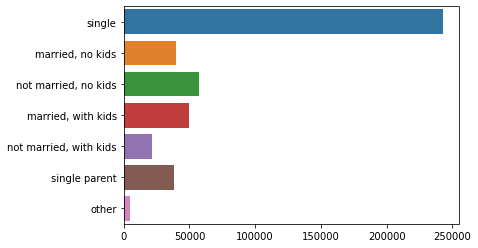

In [14]:
# Check the distribution of household types
household_cols = ['single','married, no kids','not married, no kids','married, with kids','not married, with kids','single parent','other']
household_counts = df[household_cols].sum()
sns.barplot(x=household_counts, y=household_counts.index)

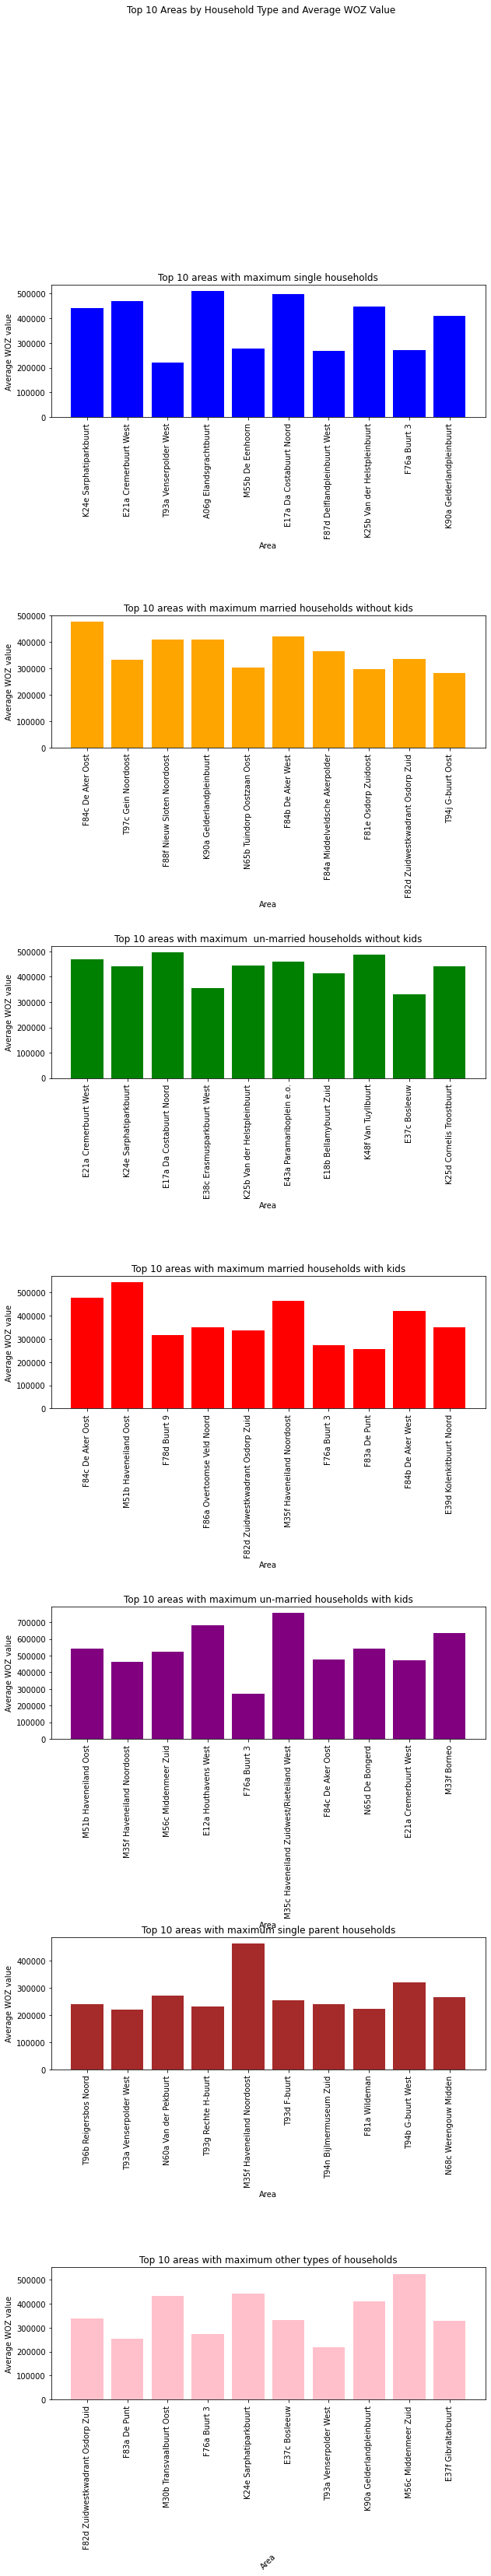

In [15]:
import matplotlib.pyplot as plt

# Get top 10 areas by household type
top_10_single = df.sort_values('single', ascending=False).head(10)
top_10_married_no_kids = df.sort_values('married, no kids', ascending=False).head(10)
top_10_not_married_no_kids = df.sort_values('not married, no kids', ascending=False).head(10)
top_10_married_with_kids = df.sort_values('married, with kids', ascending=False).head(10)
top_10_not_married_with_kids = df.sort_values('not married, with kids', ascending=False).head(10)
top_10_single_parent = df.sort_values('single parent', ascending=False).head(10)
top_10_other = df.sort_values('other', ascending=False).head(10)

# Set up subplots
fig, axs = plt.subplots(7, 1, figsize=(10, 50))

# Plot for single households
axs[0].bar(top_10_single['area'], top_10_single['average woz value'],color='blue')
axs[0].set_title('Top 10 areas with maximum single households')
axs[0].set_xlabel('Area')
axs[0].set_ylabel('Average WOZ value')
axs[0].set_xticklabels(top_10_single['area'],rotation=90)

# Plot for married households without kids
axs[1].bar(top_10_married_no_kids['area'], top_10_married_no_kids['average woz value'],color='orange')
axs[1].set_title('Top 10 areas with maximum married households without kids')
axs[1].set_xlabel('Area')
axs[1].set_ylabel('Average WOZ value')
axs[1].set_xticklabels(top_10_married_no_kids['area'],rotation=90)

# Plot for not married households without kids
axs[2].bar(top_10_not_married_no_kids['area'], top_10_not_married_no_kids['average woz value'],color='green')
axs[2].set_title('Top 10 areas with maximum  un-married households without kids')
axs[2].set_xlabel('Area')
axs[2].set_ylabel('Average WOZ value')
axs[2].set_xticklabels(top_10_not_married_no_kids['area'], rotation=90)

# Plot for married households with kids
axs[3].bar(top_10_married_with_kids['area'], top_10_married_with_kids['average woz value'],color='red')
axs[3].set_title('Top 10 areas with maximum married households with kids')
axs[3].set_xlabel('Area')
axs[3].set_ylabel('Average WOZ value')
axs[3].set_xticklabels(top_10_married_with_kids['area'], rotation=90)

# Plot for not married households with kids
axs[4].bar(top_10_not_married_with_kids['area'], top_10_not_married_with_kids['average woz value'],color='purple')
axs[4].set_title('Top 10 areas with maximum un-married households with kids')
axs[4].set_xlabel('Area')
axs[4].set_ylabel('Average WOZ value')
axs[4].set_xticklabels(top_10_not_married_with_kids['area'],rotation=90)

# Plot for single parent households
axs[5].bar(top_10_single_parent['area'], top_10_single_parent['average woz value'],color='brown')
axs[5].set_title('Top 10 areas with maximum single parent households')
axs[5].set_xlabel('Area')
axs[5].set_ylabel('Average WOZ value')
axs[5].set_xticklabels(top_10_single_parent['area'],rotation=90)

# Plot for other types of households
axs[6].bar(top_10_other['area'], top_10_other['average woz value'],color='pink')
axs[6].set_title('Top 10 areas with maximum other types of households')
axs[6].set_xlabel('Area',rotation=45)
axs[6].set_ylabel('Average WOZ value')
axs[6].set_xticklabels(top_10_other['area'], rotation=90)

# Set the title for the entire figure
fig.suptitle('Top 10 Areas by Household Type and Average WOZ Value')
fig.subplots_adjust( hspace=1.5)

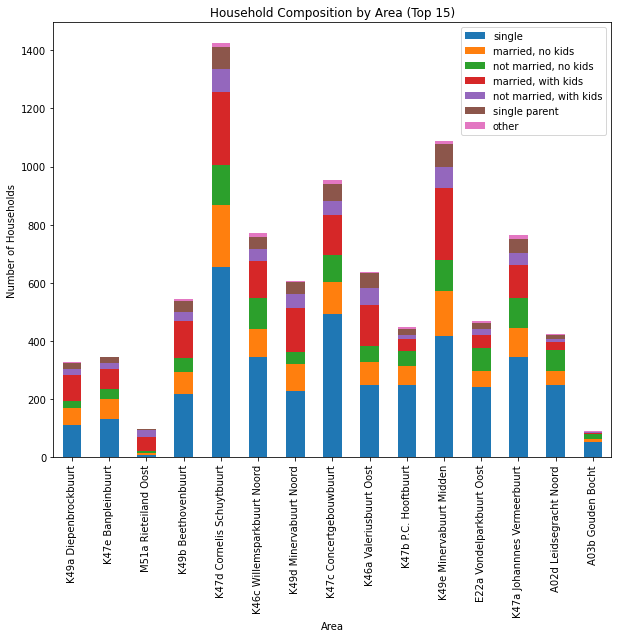

In [16]:

# Sort the dataframe by average WOZ value and get the top 15 areas
top_15_areas = df.sort_values('average woz value', ascending=False).head(15)

# Set the area column as the index
top_15_areas.set_index('area', inplace=True)

# Get the columns for the different types of households
household_composition_cols = ['single', 'married, no kids', 'not married, no kids', 'married, with kids', 'not married, with kids', 'single parent', 'other']

# Create a stacked bar chart for the top 10 areas
top_15_areas[household_composition_cols].plot(kind='bar', stacked=True, figsize=(10,8))

# Set the title and axis labels
plt.title('Household Composition by Area (Top 15)')
plt.xlabel('Area')
plt.ylabel('Number of Households')

# Show the chart
plt.show()

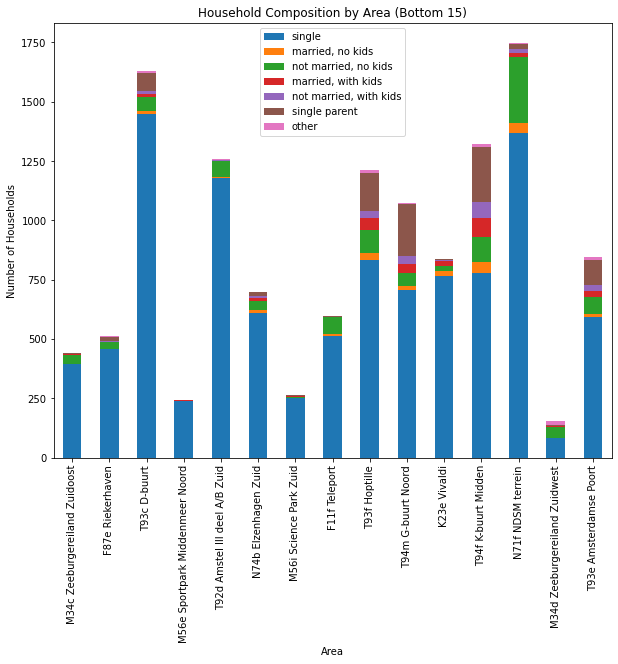

In [17]:

# Sort the dataframe by average WOZ value and get the Bottom 15 areas
last_15_areas = df.sort_values('average woz value', ascending=True).head(15)

# Set the area column as the index
last_15_areas.set_index('area', inplace=True)

# Get the columns for the different types of households
household_composition_cols = ['single', 'married, no kids', 'not married, no kids', 'married, with kids', 'not married, with kids', 'single parent', 'other']

# Create a stacked bar chart for the top 10 areas
last_15_areas[household_composition_cols].plot(kind='bar', stacked=True, figsize=(10,8))

# Set the title and axis labels
plt.title('Household Composition by Area (Bottom 15)')
plt.xlabel('Area')
plt.ylabel('Number of Households')

# Show the chart
plt.show()